## Introduction

This assignment is going to pull Litecoin crypto-currency prices from a public API and download them as Excel files.

## Analysis 

we need to import two necessary libraries.

In [66]:
import requests
import pandas as pd

Define a function that simplifies the process of importing data from Cryptowatch.

In [67]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

Now, I will pull data from Litecoin, for the last 100 days.

In [68]:
last_100days = (pd.Timestamp.now() - pd.offsets.Day(100))
last_100days

Timestamp('2022-11-16 22:20:02.181079')

After obtaining the data, we took a general observation upon them

In [69]:
litecoin = get_historic_price('ltc', 'bitstamp', after=last_100days)
litecoin.tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-02-25 00:00:00,90.97,91.63,90.97,91.62,1262.967328,115109.277518
2023-02-25 01:00:00,91.71,91.71,91.47,91.60,190.456741,17441.560723
2023-02-25 02:00:00,91.55,91.95,91.55,91.86,256.025116,23512.531975
2023-02-25 03:00:00,91.98,91.98,91.15,91.28,220.103567,20126.164892
2023-02-25 04:00:00,91.23,91.27,91.23,91.27,2.322422,211.918428


plot the data:

<AxesSubplot: xlabel='date \n Figure 1.', ylabel='Price $'>

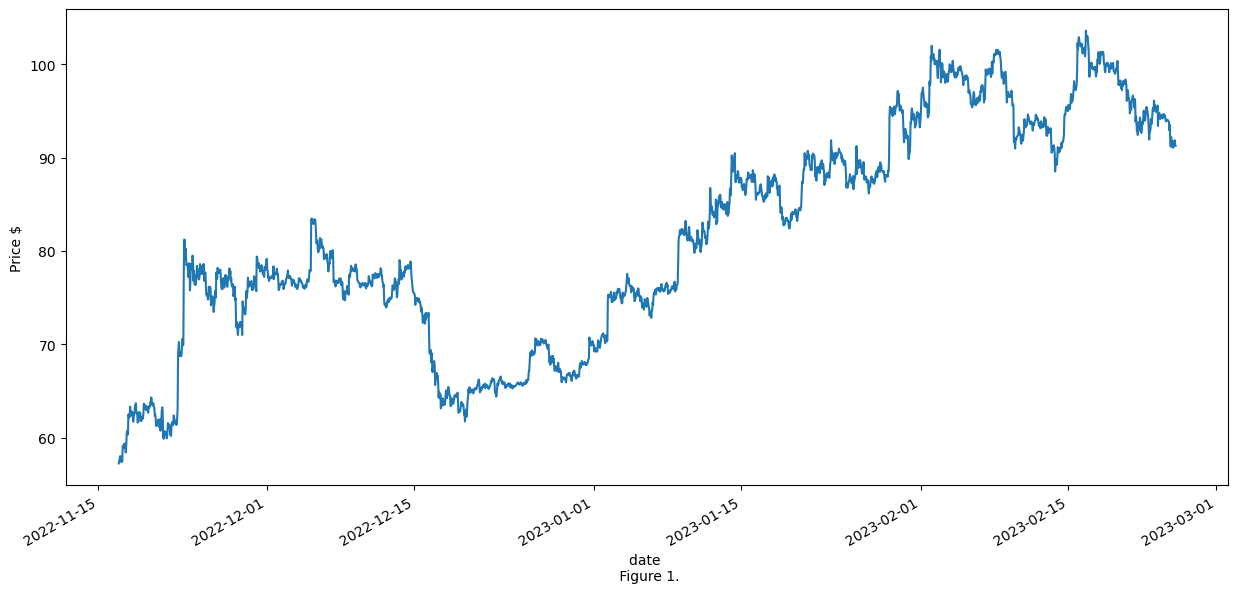

In [70]:
litecoin['ClosePrice'].plot(figsize=(15, 7), ylabel ='Price $', xlabel='date \n Figure 1.')

 Dynamic plots with Bokeh
 
 Bokeh is an interactive visualization library

In [75]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p1 = figure(x_axis_type="datetime", title="Crypto Prices")
p1.plot_height=400
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date\nFigure 2.'
p1.yaxis.axis_label = 'Price $'
p1.line(litecoin.index, litecoin['ClosePrice'], color='#f2a900', legend_label='Litecoin')
p1.legend.location = "top_left"
show(p1)

Loading BokehJS ...

Exporting to Excel

In [76]:
writer = pd.ExcelWriter(r'D:\1\EAI6010\1\'Bitcoin_history.xlsx')
litecoin.to_excel(writer, sheet_name='Litecoin')
writer.save()

## Conclusion

First, we define a function to import the data more easily, then we took a quick look at the data. The next step is to plot two graphs that indicate the price of Litecoin across time, Finally, we saved the file in Excel format.

## References

Cryptowatch(2023). Litecoin [Data set]. https://cryptowat.ch/zh-cn/assets/litecoin